# **Task: MOVIE GENRE CLASSIFICATION**


# **Batch - MARCH BATCH A41**
## **Author: Pream Day**


**Dataset:**https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## **Load the dataset**

In [ ]:
train_path = "/content/drive/MyDrive/CodSoft Internship (ML)/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Nature's Fury: Storm of the Century (2006),drama,Grammy - music award of the American academy ...
freq,1,13613,12


## **Check null value**

In [ ]:
train_data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [ ]:
test_path = "/content/drive/MyDrive/CodSoft Internship (ML)/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")

test_data

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


## **Data Preprocessing**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stemmer = nltk.LancasterStemmer()
stop_words = set(stopwords.words("english"))

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)


In [ ]:
train_data

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


## **Vectorize the data Using TF-IDF**

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data["TextCleaning"])
X_test = vectorizer.transform(test_data["TextCleaning"])

## **Split the dataset**

In [ ]:
y_train = train_data["GENRE"]

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## **Train the random forest model**

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
train_accuracy = model.score(X_train, y_train)

print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9996541467801066


In [ ]:
valid_accuracy = model.score(X_valid, y_valid)

print("Validation Accuracy:", valid_accuracy)


Validation Accuracy: 0.48575117587383565


# **Train the Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
train_accuracy2 = model2.score(X_train, y_train)

print("Training Accuracy:", train_accuracy2)

Training Accuracy: 0.7136335339282008


In [ ]:
valid_accuracy2 = model2.score(X_valid, y_valid)

print("Validation Accuracy:", valid_accuracy2)


Validation Accuracy: 0.5774232223554366


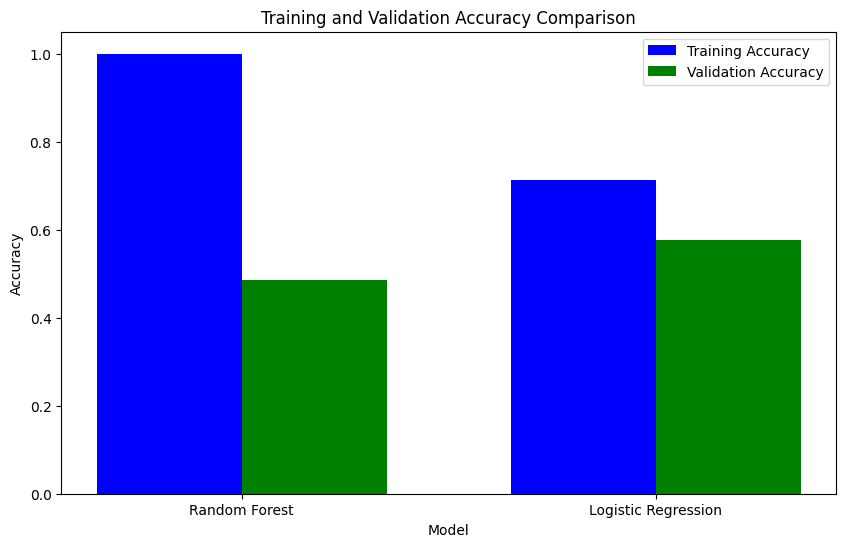

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their corresponding training and validation accuracies
models = ['Random Forest', 'Logistic Regression']
train_accuracies = [train_accuracy, train_accuracy2]
valid_accuracies = [valid_accuracy, valid_accuracy2]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, train_accuracies, bar_width, label='Training Accuracy', color='blue')
plt.bar([i + bar_width for i in index], valid_accuracies, bar_width, label='Validation Accuracy', color='green')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.show()


In [ ]:
# Assume 'plot_summary' contains the plot summary of the movie
plot_summary = "A group of friends embark on a journey to save their hometown from an alien invasion."

# Preprocess the plot summary
clean_plot_summary = cleaning_data(plot_summary)

# Vectorize the cleaned plot summary using the TF-IDF vectorizer
plot_summary_vectorized = vectorizer.transform([clean_plot_summary])

# Predict the genre using the trained logistic regression model
predicted_genre =model2.predict(plot_summary_vectorized)

print("Predicted Genre:", predicted_genre)


Predicted Genre: [' comedy ']


### The model predict the movie genre accurately.